# **Studi Kasus Pembelajaran Mendalam untuk Masalah Klasifikasi: Pengenalan Tulisan Tangan Digit**


Tugas ini melakukan eksplorasi model CNN untuk masalah Pengenalan Tulisan Tangan Digit (Digit Recognition). Dataset yang digunakan menggunakan dataset MNIST. Eksplorasi dilakukan untuk menjawab pertanyaan-pertanyaan berikut:

*   Berapa banyaknya convolution layar yang optimal?
*   Berapa ukuran filter yang optimal untuk setiap convolution layar?
*   Berapa banyaknya filter yang optimal untuk setiap convolution layar?
*   Berapa banyaknya hidden unit yang optimal pada bagian fully connected
network?

Untuk mengetahui nilai yang paling optimal, harus dilakukan percobaan dengan membuat variasi nilai dari hypermarater yang sedang dieksplorasi dengan nilai hyperparameter lainnya dibuat tetap (fixed). Jika ada nilai hyperparameter lainnya yang sudah ditemukan pada eksplorasi sebelumnya, gunakan nilai hyperparameter optimal tsb pada eksplorasi berikutnya Nilai optimal diambil dari percobaan yang menghasilkan kinerja terbaik.

Kami akan menggunakan set data pelatihan dan pengujian yang sama seperti sebelumnya, dan melanjutkan dengan cara yang sama seperti jaringan kami yang sepenuhnya terhubung untuk menentukan dan melatih model CNN baru kami. Untuk melakukan ini, kita akan menjelajahi dua layer yang belum pernah kita temui sebelumnya: Anda dapat menggunakan keras.layers.Conv2D untuk mendefinisikan layer convolutional dan keras.layers.MaxPool2D untuk mendefinisikan layer pooling. Gunakan parameter yang ditunjukkan dalam arsitektur jaringan di atas untuk menentukan lapisan ini dan membangun model CNN.

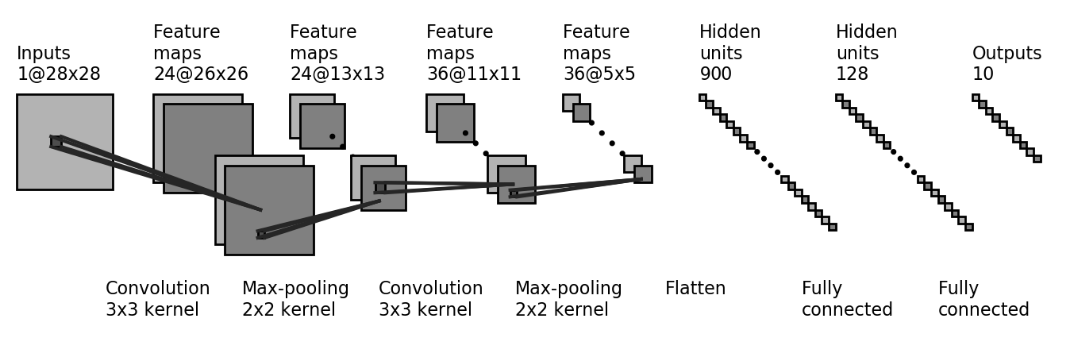

     |████████████████████████████████| 2.1 MB 5.4 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115442 sha256=23ea49910503e372b7440110e59111808003e8a2abcc7240130315a94e26b9cc
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning
11501568/11490434 [==============================] - 0s 0us/step


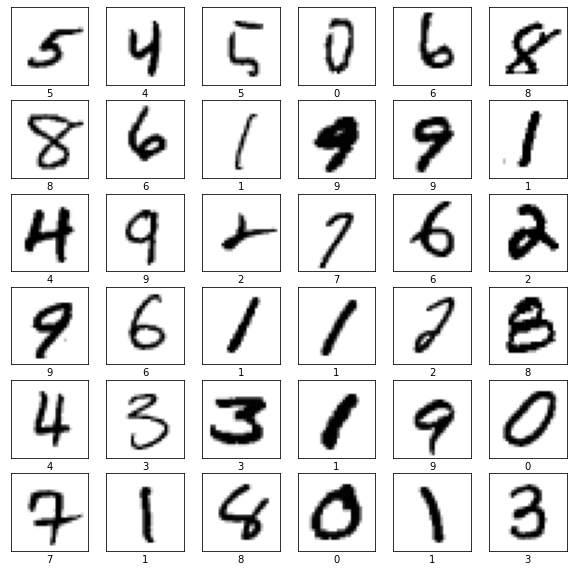

In [ ]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])


In [ ]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''') 

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        # Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''')

        # Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 128)               1

**Pelatihan dan Pengujian model CNN**

Kita dapat mendefinisikan fungsi loss, optimizer, dan metrik melalui metode kompilasi. Kompilasi model CNN dengan pengoptimal dan tingkat pembelajaran pilihan:

In [ ]:
'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Untuk melatih CNN kami menggunakan metode fit melalui Keras API.

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 8s 6ms/step - loss: 0.1907 - accuracy: 0.9435
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0550 - accuracy: 0.9835
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0387 - accuracy: 0.9877
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0292 - accuracy: 0.9911
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0237 - accuracy: 0.9923


Selanjutnya melatih model, untuk mengevaluasi pada dataset uji menggunakan metode evaluasi:

In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0266 - accuracy: 0.9902
Test accuracy: 0.9901999831199646


**Buat prediksi dengan model CNN**

Dengan model yang terlatih, kita dapat menggunakannya untuk membuat prediksi tentang beberapa gambar. Panggilan fungsi prediksi menghasilkan prediksi keluaran yang diberikan satu set sampel masukan.

In [ ]:
predictions = cnn_model.predict(test_images)

Dengan pemanggilan fungsi ini, model telah memprediksi label untuk setiap gambar dalam set pengujian. Mari kita lihat prediksi untuk gambar pertama di dataset uji:

In [ ]:
predictions[0]

array([9.46941654e-08, 1.43217340e-08, 9.53259359e-07, 6.98526321e-07,
       3.89404203e-10, 4.78727236e-09, 1.15457895e-11, 9.99997735e-01,
       6.76451819e-08, 3.55881696e-07], dtype=float32)

Seperti yang Anda lihat, prediksi adalah array 10 angka. Ingatlah bahwa output dari model kita adalah distribusi probabilitas pada 10 kelas digit. Dengan demikian, angka-angka ini menggambarkan "keyakinan" model bahwa gambar sesuai dengan masing-masing dari 10 digit yang berbeda.

Mari kita lihat digit yang memiliki kepercayaan tertinggi untuk gambar pertama di dataset uji:

7
Label of this digit is: 7


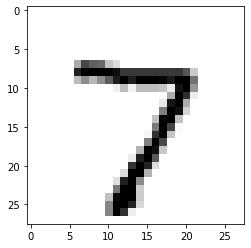

In [ ]:
prediction = np.argmax(predictions[0]) 
print(prediction)
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

# **Eksplorasi CNN yang Lebih Dalam**

**Berapa banyaknya convolution layar yang optimal?**

Dalam percobaan ini digunakan satu, dua dan tiga convolutionl layer untuk menunjukkan pengaruh jumlah konvolusional terhadap akurasi testing. 

In [ ]:
def build_cnn_model_satu_conv():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1858 - accuracy: 0.9449
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0520 - accuracy: 0.9839
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0359 - accuracy: 0.9886
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0279 - accuracy: 0.9913
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0318 - accuracy: 0.9899
Test accuracy: 0.9898999929428101


Dari tiga percobaan diatas diperoleh hasil:

*   akurasi tes satu konvolusi layer : 0.9898999929428101
*   akurasi tes dua konvolusi layer : 0.9878000020980835
*   akurasi tes tiga konvolusi layer : 0.9907000064849854

Hasil tersebut menunjukkan bahwa dengan satu konvolusi layer sudah cukup baik dalam hal akurasi.

**Berapa banyaknya filter yang optimal untuk setiap convolution layar?**

Untuk mengetahui pengaruh jumlah filter rerhadap akurasidilakukan beberapa percobaan berikut:



In [ ]:
def build_cnn_model_satu_conv():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.1773 - accuracy: 0.9469
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0519 - accuracy: 0.9836
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0369 - accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0289 - accuracy: 0.9906
Test accuracy: 0.9905999898910522


Dari variasi jumlah filter diperoleh hasil sebagai berikut:

*   Jumlah filter 16: akurasi = 0.9905999898910522
*   Jumlah filter 32: akurasi = 0.9896000027656555
*   Jumlah filter 40: akurasi = 0.9904999732971191

Dari hasil tersebut jumlah filter 16 sudah memberikan akurasi yang cukup baik.



**Berapa ukuran filter yang optimal untuk setiap convolution layar?**

Ukuran filter dalam CNN digunakan untuk ekstraksi ciri sehingga perlu dilakukan optimasi ukuran filter yang sesuai. Beberapa ukuran filter yang digunakan berupa 3x3, 5x5, dan 7x7

In [ ]:
def build_cnn_model_satu_conv():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.1955 - accuracy: 0.9417
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0568 - accuracy: 0.9822
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0396 - accuracy: 0.9880
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0310 - accuracy: 0.9900
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0256 - accuracy: 0.9905
Test accuracy: 0.9904999732971191


Variasi ukuran filter diperoleh hasil sebagai berikut:

*   Ukuran filter 3x3: akurasi = 0.9905999898910522
*   Ukuran filter 5x5: akurasi = 0.9904999732971191
*   Ukuran filter 7x7: akurasi = 0.9876999855041504

Dari hasil tersebut ukuran filter 3x3 sudah memberikan akurasi yang cukup baik.



**Berapa banyaknya hidden unit yang optimal pada bagian fully connected network?**

Optimasi CNN dapat juga dilakukan pada bagian fully connected network. Berikut percobaan untuk mengamaati pengaruh hidden unit terhadap akurasi:




In [ ]:
def build_cnn_model_satu_conv():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation=tf.nn.relu),

        #  Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 5
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.1770 - accuracy: 0.9471
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0545 - accuracy: 0.9830
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0372 - accuracy: 0.9884
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0273 - accuracy: 0.9913
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0352 - accuracy: 0.9896
Test accuracy: 0.9896000027656555


Berikut hasil akurasi terhdap variasi jumlah unit dalam hidden layer:

*   Hidden layer 128 unit, akurasi = 0.9905999898910522
*   Hidden layer 256 unit, akurasi = 0.9896000027656555
*   Hidden layer 512 unit, akurasi = 0.9901999831199646

Hidden unit sebanyak 128 memberikan akurasi yang hampir sama dengan 256 unit bahkan 512 unit.